# Week 5, Data science in Neuroscience


## Plan for today

1. Introduction to pytorch
2. Tensors
3. Training loop in pytorch
4. A first neural network
5. A convolutional network to process images

***


# Pytorch

Pytorch is a Python library that facilitates building deep learning projects

* Store data into Tensors (multidimensional arrays that are similar to NumPy arrays)
* Allows fast calculations on dedicated hardware (GPUs)
* Ability of tensors to keep track of the operations performed on them and to analytically compute derivatives
* Classes to deal with datasets
* Classes to simplify building deep neural networks

# Tensors

pytorch tensors are very similar to NumPy arrays. They have 2 main advantages

* Used to do calculations on a GPU
* Can keep track of the graph of computations that created them (used to calculate derivatives) 

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Creating tensors

In [2]:
torch.ones(5)

tensor([1., 1., 1., 1., 1.])

In [3]:
torch.zeros(3,4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [4]:
a = torch.tensor([[1.0,2],[3,4]])
a

tensor([[1., 2.],
        [3., 4.]])

You can interrogate a tensor just like a NumPy array.

In [5]:
print("shape:", a.shape)
print("ndim:", a.ndim)
print("dtype:", a.dtype)

shape: torch.Size([2, 2])
ndim: 2
dtype: torch.float32


Many of the mathematical functions of NumPy have a torch equivalent.

In [6]:
b = torch.rand(24).reshape(4,6)
b

tensor([[0.9330, 0.1507, 0.7393, 0.1177, 0.5452, 0.1233],
        [0.0116, 0.3436, 0.7411, 0.3237, 0.2813, 0.1746],
        [0.9998, 0.3083, 0.5358, 0.4842, 0.7660, 0.9541],
        [0.4573, 0.4624, 0.2329, 0.0727, 0.6200, 0.7068]])

In [7]:
b.shape

torch.Size([4, 6])

In [8]:
b.mean()

tensor(0.4619)

In [9]:
b.mean(axis=0)

tensor([0.6004, 0.3163, 0.5623, 0.2496, 0.5531, 0.4897])

We can add an extra dimension with a size of 1 using unsqueeze().

In [10]:
b.shape

torch.Size([4, 6])

In [11]:
b.unsqueeze(0).shape

torch.Size([1, 4, 6])

We can do broadcasting, just like with NumPy arrays.

```
When operating on two arrays, pytorch compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when
​
* they are equal, or
* one of them is 1
```


In [12]:
b.shape

torch.Size([4, 6])

In [81]:
a = torch.ones(4)
a.shape

torch.Size([4])

In [82]:
#b+a

In [83]:
A = a.unsqueeze(1)
A.shape

torch.Size([4, 1])

In [84]:
b+A

tensor([[2.],
        [2.],
        [2.],
        [2.]])

We can change the order of the dimensions in a tensor with `.permute()

In [93]:
b = torch.rand(3*24).reshape(3,4,6)
b

tensor([[[0.4489, 0.9085, 0.9585, 0.5058, 0.7458, 0.5151],
         [0.3265, 0.6280, 0.5801, 0.6143, 0.6757, 0.4789],
         [0.3318, 0.7552, 0.5680, 0.0576, 0.5897, 0.9134],
         [0.1875, 0.4600, 0.7629, 0.1719, 0.0689, 0.8590]],

        [[0.9082, 0.1223, 0.4613, 0.2954, 0.7318, 0.9540],
         [0.4279, 0.7426, 0.4810, 0.8614, 0.3566, 0.7179],
         [0.3126, 0.9879, 0.2349, 0.4928, 0.6883, 0.5387],
         [0.6441, 0.7624, 0.7592, 0.0248, 0.9587, 0.8299]],

        [[0.8385, 0.6784, 0.6622, 0.2553, 0.6773, 0.4999],
         [0.1930, 0.1792, 0.5091, 0.3198, 0.9375, 0.0862],
         [0.3994, 0.6699, 0.3618, 0.3845, 0.7721, 0.8254],
         [0.7310, 0.5436, 0.8397, 0.0446, 0.2766, 0.6438]]])

In [94]:
b.shape

torch.Size([3, 4, 6])

In [95]:
b = b.permute(1,2,0)
b.shape

torch.Size([4, 6, 3])

### Moving tensors to the GPU

In [17]:
torch.cuda.is_available()

True

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

Using device: cuda



In [19]:
b

tensor([[0.9330, 0.1507, 0.7393, 0.1177, 0.5452, 0.1233],
        [0.0116, 0.3436, 0.7411, 0.3237, 0.2813, 0.1746],
        [0.9998, 0.3083, 0.5358, 0.4842, 0.7660, 0.9541],
        [0.4573, 0.4624, 0.2329, 0.0727, 0.6200, 0.7068]])

In [20]:
b = b.to(device)

In [21]:
b

tensor([[0.9330, 0.1507, 0.7393, 0.1177, 0.5452, 0.1233],
        [0.0116, 0.3436, 0.7411, 0.3237, 0.2813, 0.1746],
        [0.9998, 0.3083, 0.5358, 0.4842, 0.7660, 0.9541],
        [0.4573, 0.4624, 0.2329, 0.0727, 0.6200, 0.7068]], device='cuda:0')

In [22]:
b = b.to("cpu")
b

tensor([[0.9330, 0.1507, 0.7393, 0.1177, 0.5452, 0.1233],
        [0.0116, 0.3436, 0.7411, 0.3237, 0.2813, 0.1746],
        [0.9998, 0.3083, 0.5358, 0.4842, 0.7660, 0.9541],
        [0.4573, 0.4624, 0.2329, 0.0727, 0.6200, 0.7068]])

In [23]:
b = b.to("cuda")
b

tensor([[0.9330, 0.1507, 0.7393, 0.1177, 0.5452, 0.1233],
        [0.0116, 0.3436, 0.7411, 0.3237, 0.2813, 0.1746],
        [0.9998, 0.3083, 0.5358, 0.4842, 0.7660, 0.9541],
        [0.4573, 0.4624, 0.2329, 0.0727, 0.6200, 0.7068]], device='cuda:0')

## From pytorch tensors to NumPy arrays and back

You can go between tensors and NumPy arrays using `torch.from_numpy()` and `myTensor.numpy()`

In [24]:
points_pt = torch.tensor([2,3,4])
print(type(points_pt))
points_np = points_pt.numpy()
print(type(points_np))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [25]:
a = np.array([1,2,3,4])
torch.from_numpy(a)

tensor([1, 2, 3, 4])

# Training a model using pytorch

We will recreate our machine learning example of week 2 using pytorch.

We want to predict the firing rate of a neuron from the running speed of the animal.


In [26]:
fn = "../data/animal_speed.npy"

In [27]:
speed = np.load(fn)
speed = speed[0:100]

In [28]:
w = 1.25 # weight (slope)
b = 10 # bias (intercept)
np.random.seed(0)
e = np.random.normal(loc=0.0, scale=5, size = speed.shape[0]) # random numbers taken from a normal distribution

rate = speed* w + b + e # simulate the firing rate
rate = np.maximum(0, rate) # eliminate the negative firing rates

Text(0, 0.5, 'Firing rate (Hz)')

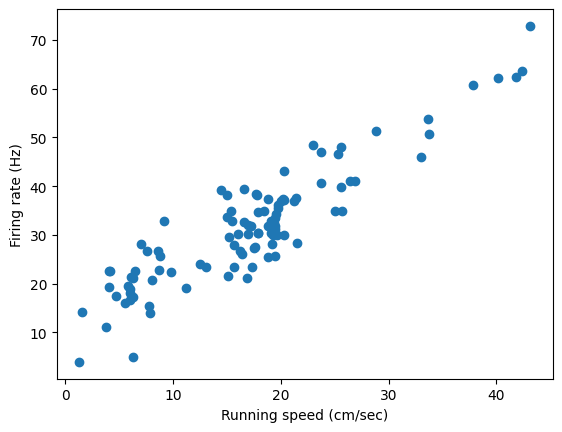

In [29]:
plt.scatter(speed,rate)
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")

### Create a model with pytorch

We will recreate our linear regression model using pytorch. 


$yhat = b+ w*X$

We will create our model by defining a class. 

There are simpler ways to create simple models in pytorch. But the way presented here is the very flexible. We can create all our models by just modifying our class.

<img src="../images/neuron_linear.png" width="500" align="center">

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

In [30]:
import torch.nn as nn

class Lin_model(nn.Module):
    """
    Class to create pytorch model.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.linLayer = nn.Linear(in_features=1, out_features=1, bias=True)
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.linLayer(x)
        return out

In [31]:
lin_model = Lin_model() # create model from our class definition

The parameters of the models are created automatically when creating the model.

We can use this for loop to print the parameters.

In [32]:
for name,p in lin_model.named_parameters():
    print(name,p)

linLayer.weight Parameter containing:
tensor([[-0.0198]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([-0.1245], requires_grad=True)


### Loss function

pytorch has built-in loss functions that we can use in our training loop. We will use the mean squared error (MSE).

In [33]:
# loss function returning MSE
loss_fn = torch.nn.MSELoss()

### pytorch optimizers

Optimizers are used to change our model parameters during learning.

There are several optimization strategies and tricks that can improve learning. 

There are more important when building deep neural networks than for linear regression models.

Let's see how to use the SGD optimizer.

In [34]:
import torch.optim as optim

In [35]:
learning_rate = 0.001
optimizer = optim.SGD(lin_model.parameters(),lr=learning_rate)

### Correct data format for our model

* X: input data
* y: labels or values that we want to predict


We need to store them in `tensors`.

The first dimension (rows) is for the observations.

We only have 1 input feature (speed), so the second dimension will have a size of 1.

In [36]:
X = torch.from_numpy(speed).unsqueeze(1).float()

In [37]:
X.shape

torch.Size([100, 1])

In [38]:
y = torch.from_numpy(rate).unsqueeze(1).float()
y.shape

torch.Size([100, 1])

### One forward pass 

We now all our needed element to train our model.

Before using our training loop, it is a good idea to run one forward pass outside of the for loop to identify potential problems.

We run all the steps that will be in our training loop.

In [39]:
for name,p in lin_model.named_parameters():
    print(name,p)

linLayer.weight Parameter containing:
tensor([[-0.0198]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([-0.1245], requires_grad=True)


In [40]:
print("Number of parameters:", sum(p.numel() for p in lin_model.parameters()))

Number of parameters: 2


In [41]:
yhat = lin_model(X)

In [42]:
loss = loss_fn(yhat,y)

In [43]:
optimizer.zero_grad() # zero the gradients

In [44]:
loss.backward() # calculate gradients

In [45]:
optimizer.step() # will change the model parameters to reduce the loss        

In [46]:
for name,p in lin_model.named_parameters():
    print(name,p)

linLayer.weight Parameter containing:
tensor([[1.2827]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([-0.0603], requires_grad=True)


### Training loop

We want a generic training loop that will work in most situations.

In [47]:
## training loop that will modify our parameters to minimize the loss function (MSE)
def training_loop(n_epochs, optimizer, loss_fn, model, X,y):
    for epoch in range (n_epochs):
        
        yhat = model(X) # make predictions
        loss = loss_fn(yhat,y) # calculate the loss
        optimizer.zero_grad() # zero the gradients of our model's parameters
        loss.backward() # calculate gradients of the model's parameters
        optimizer.step() # will change the model parameters to reduce the loss
        
        
        if epoch % 1000 ==0 or epoch < 10:
            print("Epoch: {}, Loss: {}".format(epoch,loss))
    return

In [48]:
training_loop(n_epochs = 20000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=lin_model,
              X = X,
              y=y)

Epoch: 0, Loss: 121.61949920654297
Epoch: 1, Loss: 54.32725143432617
Epoch: 2, Loss: 50.0529899597168
Epoch: 3, Loss: 49.762962341308594
Epoch: 4, Loss: 49.724849700927734
Epoch: 5, Loss: 49.70269012451172
Epoch: 6, Loss: 49.681549072265625
Epoch: 7, Loss: 49.660491943359375
Epoch: 8, Loss: 49.63945388793945
Epoch: 9, Loss: 49.61844253540039
Epoch: 1000, Loss: 35.64689636230469
Epoch: 2000, Loss: 29.6934871673584
Epoch: 3000, Loss: 27.190690994262695
Epoch: 4000, Loss: 26.13851547241211
Epoch: 5000, Loss: 25.696191787719727
Epoch: 6000, Loss: 25.510236740112305
Epoch: 7000, Loss: 25.43206024169922
Epoch: 8000, Loss: 25.39919662475586
Epoch: 9000, Loss: 25.3853816986084
Epoch: 10000, Loss: 25.37957191467285
Epoch: 11000, Loss: 25.377134323120117
Epoch: 12000, Loss: 25.376108169555664
Epoch: 13000, Loss: 25.37567138671875
Epoch: 14000, Loss: 25.37548828125
Epoch: 15000, Loss: 25.375415802001953
Epoch: 16000, Loss: 25.375383377075195
Epoch: 17000, Loss: 25.3753719329834
Epoch: 18000, Loss

In [49]:
for p in lin_model.parameters():
    print(p)

Parameter containing:
tensor([[1.2343]], requires_grad=True)
Parameter containing:
tensor([10.5677], requires_grad=True)


In [50]:
t_range = torch.arange(0,50,0.5).unsqueeze(1)
t_range.shape

torch.Size([100, 1])

In [51]:
lin_yhat = lin_model(t_range)

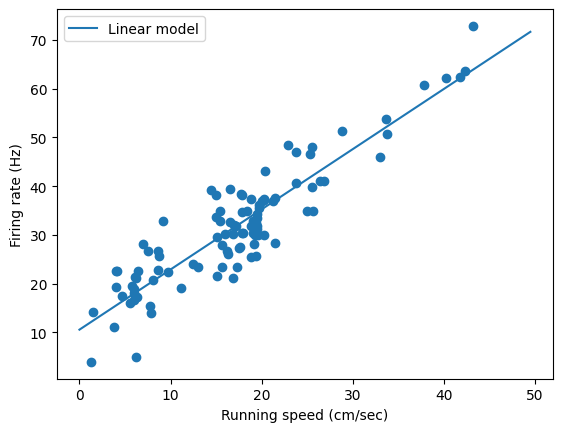

In [52]:
plt.scatter(speed,rate)
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

We found the parameters that were used to simulate the data.

# A first neural network

* Mathematical entities capable of representing complicated functions through a composition of simpler functions.
* Deep neural network have **multiple layers** between the input and output layers. 
* Each layer has several artificial neurons. 
* New data comes from the left, and calculations propagates towards the ouput layer.



***

* A neuron in a neural network has one more non-linear function. 

<img src="../images/artificial_neuron.png" width="500" align="center">

The non-linear function allows the model to have different slope at different values.

The non-linear function of the neuron is called the **activation function**.

Text(0.5, 1.0, 'Non-linear model: tanh(w*x+b)')

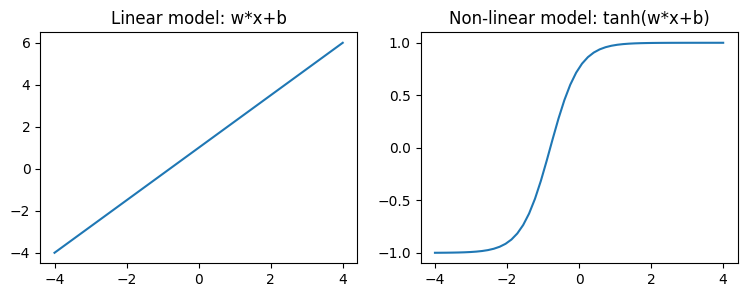

In [53]:
nrow=1
ncol=2
fig, ax = plt.subplots(nrow,ncol,figsize=(9,3))

XX = np.linspace(-4,4) # input
          
w=1.25
b=1.0
                
ax[0].plot(XX,w*XX+b)
ax[0].set_title("Linear model: w*x+b")

ax[1].plot(XX,np.tanh(w*XX+b))
ax[1].set_title("Non-linear model: tanh(w*x+b)")

In neural network, we have **several artificial neurons**. 

The output of several neurons is summed to get the output.

Let's build a neural network to predict the firing rate from the speed of the animal.

In [54]:
class NN_model(nn.Module):
    """
    Class to create pytorch model. This is a neural network because of the non-linear function.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.layer1 = nn.Linear(in_features=1, out_features=5, bias=True)
        self.tanh = nn.Tanh()
        self.layer2 = nn.Linear(in_features=5, out_features=1, bias=True)
        
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.layer1(x)
        out = self.tanh(out)
        out = self.layer2(out)
        return out

In [55]:
nn_model = NN_model()

In [56]:
for name, p in nn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[-0.6908],
        [-0.7377],
        [ 0.4573],
        [-0.5864],
        [-0.4168]], requires_grad=True)
layer1.bias Parameter containing:
tensor([-0.4484,  0.6861, -0.6412, -0.1416,  0.9512], requires_grad=True)
layer2.weight Parameter containing:
tensor([[-0.4421, -0.0761,  0.3265, -0.0623,  0.0729]], requires_grad=True)
layer2.bias Parameter containing:
tensor([-0.2546], requires_grad=True)


In [57]:
print("Number of parameters:", sum(p.numel() for p in nn_model.parameters()))

Number of parameters: 16


In [58]:
learning_rate=0.0001
optimizer = optim.SGD(nn_model.parameters(),lr=learning_rate)

In [59]:
training_loop(n_epochs = 30000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=nn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 1115.94677734375
Epoch: 1, Loss: 1113.658203125
Epoch: 2, Loss: 1111.374755859375
Epoch: 3, Loss: 1109.096923828125
Epoch: 4, Loss: 1106.82421875
Epoch: 5, Loss: 1104.5567626953125
Epoch: 6, Loss: 1102.2945556640625
Epoch: 7, Loss: 1100.037841796875
Epoch: 8, Loss: 1097.7861328125
Epoch: 9, Loss: 1095.539794921875
Epoch: 1000, Loss: 230.19456481933594
Epoch: 2000, Loss: 115.29666900634766
Epoch: 3000, Loss: 85.00819396972656
Epoch: 4000, Loss: 70.76943969726562
Epoch: 5000, Loss: 61.598670959472656
Epoch: 6000, Loss: 58.56230545043945
Epoch: 7000, Loss: 60.71868133544922
Epoch: 8000, Loss: 61.049015045166016
Epoch: 9000, Loss: 56.901336669921875
Epoch: 10000, Loss: 49.59247589111328
Epoch: 11000, Loss: 44.146095275878906
Epoch: 12000, Loss: 41.159297943115234
Epoch: 13000, Loss: 39.022193908691406
Epoch: 14000, Loss: 37.358089447021484
Epoch: 15000, Loss: 36.01516342163086
Epoch: 16000, Loss: 34.90761947631836
Epoch: 17000, Loss: 33.98020935058594
Epoch: 18000, Loss: 33

In [60]:
for name, p in nn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[-0.6588],
        [-0.9389],
        [ 0.1179],
        [-0.4937],
        [-0.1608]], requires_grad=True)
layer1.bias Parameter containing:
tensor([-0.3667,  0.7764, -1.7535, -0.0322,  4.7697], requires_grad=True)
layer2.weight Parameter containing:
tensor([[ -9.6341,  -9.2842,   9.7838,  -9.2579, -10.0076]],
       requires_grad=True)
layer2.bias Parameter containing:
tensor([8.9320], requires_grad=True)


### Let's compare our linear model with our small neural network

In [61]:
t_range = torch.arange(0,50,0.5).unsqueeze(1)
t_range.shape

torch.Size([100, 1])

In [62]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)

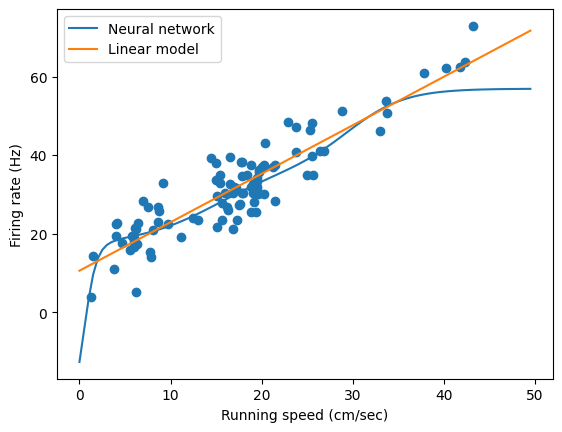

In [63]:
plt.scatter(speed,rate)
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

### Neural networks can model all sorts of functions

Let's try our two models on some non-linear problems

In [64]:
X = torch.arange(0,10,0.1).unsqueeze(1)
print(X.shape)
y = torch.sin(X)*4 + torch.randn(100, 1)

torch.Size([100, 1])


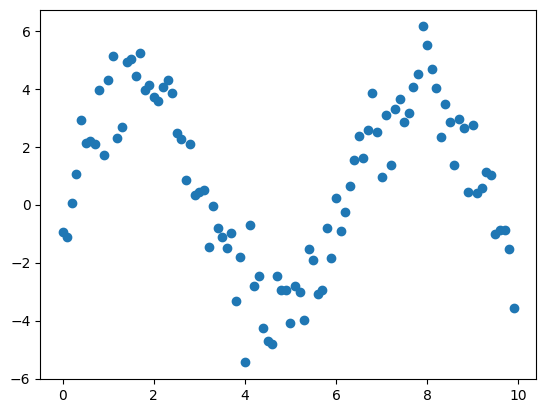

In [65]:
plt.scatter(X.numpy(),y.numpy())

In [66]:
learning_rate=0.001
optimizer = optim.SGD(nn_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 40000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=nn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 298.8535461425781
Epoch: 1, Loss: 224.7544403076172
Epoch: 2, Loss: 216.6913604736328
Epoch: 3, Loss: 203.6102752685547
Epoch: 4, Loss: 158.8841552734375
Epoch: 5, Loss: 28.375892639160156
Epoch: 6, Loss: 24.547035217285156
Epoch: 7, Loss: 21.734819412231445
Epoch: 8, Loss: 19.744308471679688
Epoch: 9, Loss: 18.348909378051758
Epoch: 1000, Loss: 5.749683380126953
Epoch: 2000, Loss: 5.62325382232666
Epoch: 3000, Loss: 5.497255325317383
Epoch: 4000, Loss: 5.35938835144043
Epoch: 5000, Loss: 5.194683074951172
Epoch: 6000, Loss: 4.762139797210693
Epoch: 7000, Loss: 4.232913017272949
Epoch: 8000, Loss: 3.3045523166656494
Epoch: 9000, Loss: 3.028557062149048
Epoch: 10000, Loss: 2.865870952606201
Epoch: 11000, Loss: 2.7851452827453613
Epoch: 12000, Loss: 2.735546350479126
Epoch: 13000, Loss: 2.696187973022461
Epoch: 14000, Loss: 2.661231756210327
Epoch: 15000, Loss: 2.6284866333007812
Epoch: 16000, Loss: 2.5970520973205566
Epoch: 17000, Loss: 2.5666544437408447
Epoch: 18000, L

In [67]:
learning_rate=0.001
optimizer = optim.SGD(lin_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 40000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=lin_model,
              X = X,
              y=y)

Epoch: 0, Loss: 271.0068359375
Epoch: 1, Loss: 239.42535400390625
Epoch: 2, Loss: 211.94171142578125
Epoch: 3, Loss: 188.02383422851562
Epoch: 4, Loss: 167.20877075195312
Epoch: 5, Loss: 149.09365844726562
Epoch: 6, Loss: 133.32797241210938
Epoch: 7, Loss: 119.6066665649414
Epoch: 8, Loss: 107.66431427001953
Epoch: 9, Loss: 97.2699203491211
Epoch: 1000, Loss: 15.239110946655273
Epoch: 2000, Loss: 10.540094375610352
Epoch: 3000, Loss: 8.798572540283203
Epoch: 4000, Loss: 8.153141021728516
Epoch: 5000, Loss: 7.913935661315918
Epoch: 6000, Loss: 7.825283050537109
Epoch: 7000, Loss: 7.792428016662598
Epoch: 8000, Loss: 7.780251502990723
Epoch: 9000, Loss: 7.775737762451172
Epoch: 10000, Loss: 7.7740654945373535
Epoch: 11000, Loss: 7.7734456062316895
Epoch: 12000, Loss: 7.7732157707214355
Epoch: 13000, Loss: 7.773130416870117
Epoch: 14000, Loss: 7.773099422454834
Epoch: 15000, Loss: 7.773087978363037
Epoch: 16000, Loss: 7.773083686828613
Epoch: 17000, Loss: 7.773080825805664
Epoch: 18000, L

In [68]:
t_range = torch.arange(0,10,0.2).unsqueeze(1)
t_range.shape

torch.Size([50, 1])

In [69]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)

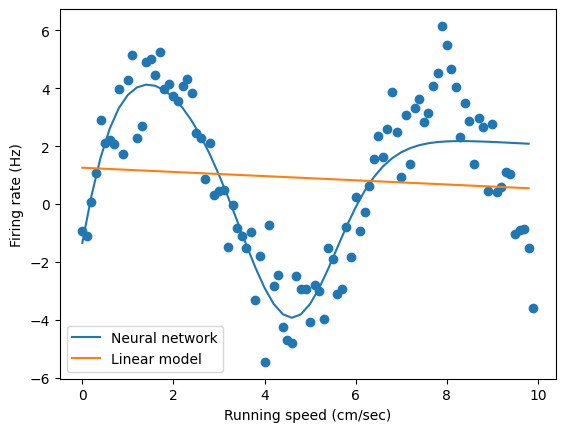

In [70]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

The non-linearity in the artifical neurons makes it possible to fit all sorts of function.

Here, the neural network is a better approximation of the underlying data. 

## Exercise

### Improve our neural network model

Our neural network is good but it is not perfect. 

How could you modify this model to make it fit the data more closely?

Have a go at trying to improve its predictions.

## Adding more hidden layers to create a deep neural network

**Deep neural networks** have several hidden layers.

* The output of the first layer have a shape similar to the activiation function.
* The next level can combine the inputs of the first layers to create more complex functions.


Text(0.5, 1.0, 'layer 2, neuron 1')

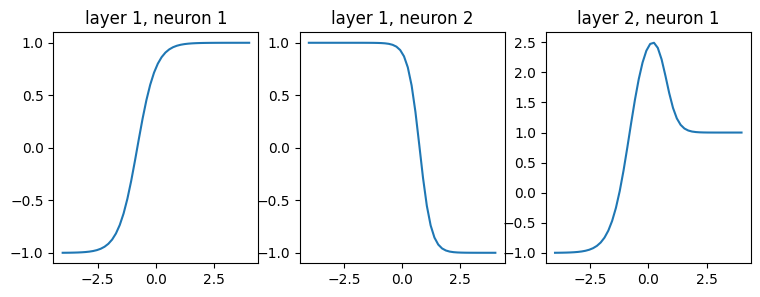

In [71]:
nrow=1
ncol=3
fig, ax = plt.subplots(nrow,ncol,figsize=(9,3))

XX = np.linspace(-4,4) # input
      
# 
w1=1.25
b1=1.0                
ax[0].plot(XX,np.tanh(w1*XX+b1))
ax[0].set_title("layer 1, neuron 1")

w2=-2
b2=1.5
ax[1].plot(XX,np.tanh(w2*XX+b2))
ax[1].set_title("layer 1, neuron 2")


w3=[2,1]
b3=2
ax[2].plot(XX,w3[0]*np.tanh(w1*XX+b1)+ w3[1]*np.tanh(w2*XX+b2))
ax[2].set_title("layer 2, neuron 1")


In [72]:
class DNN_model(nn.Module):
    """
    Class to create pytorch model. This is a neural network because of the non-linear function.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.layer1 = nn.Linear(in_features=1, out_features=10, bias=True)
        self.layer2 = nn.Linear(in_features=10, out_features=10, bias=True)
        self.layer3 = nn.Linear(in_features=10, out_features=1, bias=True)
        self.tanh = nn.Tanh()
        
        
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.tanh(self.layer1(x))
        out = self.tanh(self.layer2(out))
        out = self.layer3(out)
        
        return out

In [73]:
dnn_model = DNN_model()

In [74]:
for name, p in dnn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[-0.8136],
        [ 0.2188],
        [-0.2173],
        [ 0.7477],
        [ 0.7980],
        [ 0.2555],
        [-0.5393],
        [-0.5410],
        [-0.8238],
        [-0.8872]], requires_grad=True)
layer1.bias Parameter containing:
tensor([-0.8669,  0.9229,  0.9928,  0.7647,  0.2477,  0.4874, -0.6235, -0.8890,
        -0.0591,  0.8200], requires_grad=True)
layer2.weight Parameter containing:
tensor([[-0.2282, -0.1926, -0.0028,  0.0868, -0.2049,  0.1047,  0.2304, -0.1732,
          0.0979,  0.2715],
        [-0.2769, -0.3136, -0.1325, -0.2483,  0.1972,  0.0243, -0.0328,  0.2155,
          0.3031,  0.1041],
        [ 0.1759,  0.0110, -0.2496,  0.2980,  0.1727,  0.1837, -0.2584, -0.2225,
         -0.2397, -0.0372],
        [ 0.1023, -0.2866, -0.1047, -0.2090, -0.1101, -0.2838, -0.0509, -0.0176,
          0.1038,  0.1952],
        [-0.2620, -0.2249, -0.3018, -0.1474, -0.2559,  0.0086,  0.0277, -0.0704,
         -0.2163, -0.2683],
        [-0

In [75]:
print("Number of parameters:", sum(p.numel() for p in dnn_model.parameters()))

Number of parameters: 141


In [76]:
learning_rate=0.001
optimizer = optim.SGD(dnn_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 40000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=dnn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 8.456633567810059
Epoch: 1, Loss: 8.44424057006836
Epoch: 2, Loss: 8.432125091552734
Epoch: 3, Loss: 8.420280456542969
Epoch: 4, Loss: 8.408702850341797
Epoch: 5, Loss: 8.397383689880371
Epoch: 6, Loss: 8.386320114135742
Epoch: 7, Loss: 8.375505447387695
Epoch: 8, Loss: 8.3649320602417
Epoch: 9, Loss: 8.354597091674805
Epoch: 1000, Loss: 7.737045764923096
Epoch: 2000, Loss: 7.189779758453369
Epoch: 3000, Loss: 6.681074619293213
Epoch: 4000, Loss: 6.441878795623779
Epoch: 5000, Loss: 6.280977249145508
Epoch: 6000, Loss: 6.119576454162598
Epoch: 7000, Loss: 5.87236213684082
Epoch: 8000, Loss: 4.836536884307861
Epoch: 9000, Loss: 3.356696844100952
Epoch: 10000, Loss: 2.7066245079040527
Epoch: 11000, Loss: 2.514957904815674
Epoch: 12000, Loss: 2.4180185794830322
Epoch: 13000, Loss: 2.347174644470215
Epoch: 14000, Loss: 2.2912137508392334
Epoch: 15000, Loss: 2.246753215789795
Epoch: 16000, Loss: 2.2098586559295654
Epoch: 17000, Loss: 2.1767847537994385
Epoch: 18000, Loss: 2.

In [77]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)
dnn_yhat = dnn_model(t_range)

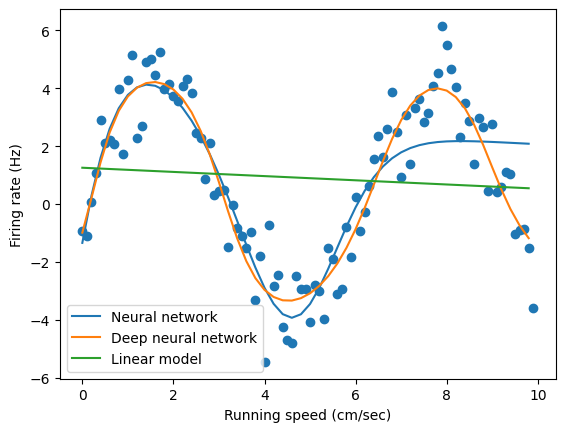

In [78]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),dnn_yhat.detach().numpy(),label="Deep neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()